# Exploratory Data analysis of Employees dataset



In [3]:
#Loading the libraries
import pandas as pd
import numpy as np
# Read dataset using pandas
df = pd.read_csv(r"C:\Users\excel\Downloads\employees.csv")
df.head(3)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,08-06-1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance


In [2]:
df.dtypes

First Name            object
Gender                object
Start Date            object
Last Login Time       object
Salary                 int64
Bonus %              float64
Senior Management     object
Team                  object
dtype: object

In [4]:
# last five rows of data
df.tail()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development
999,Albert,Male,5/15/2012,6:24 PM,129949,10.169,True,Sales


In [5]:
# columns information 
df.columns

Index(['First Name', 'Gender', 'Start Date', 'Last Login Time', 'Salary',
       'Bonus %', 'Senior Management', 'Team'],
      dtype='object')

In [6]:
# number of rows and columns
df.shape

(1000, 8)

In [7]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [8]:
df['Start Date']

0      08-06-1993
1       3/31/1996
2       4/23/1993
3      03-04-2005
4       1/24/1998
          ...    
995    11/23/2014
996     1/31/1984
997     5/20/2013
998     4/20/2013
999     5/15/2012
Name: Start Date, Length: 1000, dtype: object

In [9]:
# convert "Start Date" column to datetime data type
df['Start Date'] = pd.to_datetime(df['Start Date'], format='mixed') # '%y/%m/%d

In [10]:
df['Start Date']

0     1993-08-06
1     1996-03-31
2     1993-04-23
3     2005-03-04
4     1998-01-24
         ...    
995   2014-11-23
996   1984-01-31
997   2013-05-20
998   2013-04-20
999   2012-05-15
Name: Start Date, Length: 1000, dtype: datetime64[ns]

In [11]:
df['First Name'] = df['First Name'].astype('string') 

In [12]:
df['First Name'].head()

0    Douglas
1     Thomas
2      Maria
3      Jerry
4      Larry
Name: First Name, dtype: string

In [ ]:
# docs of astype function.
help(pd.Series.astype)

In [13]:
df['Gender'] = df['Gender'].astype('string') 
df['Senior Management'] = df['Senior Management'].astype('bool') 
df['Team'] = df['Team'].astype('string') 

In [14]:
# data type for multiple column
df.dtypes

First Name           string[python]
Gender               string[python]
Start Date           datetime64[ns]
Last Login Time              object
Salary                        int64
Bonus %                     float64
Senior Management              bool
Team                 string[python]
dtype: object

In [15]:
# renameing the columns
columns = {'First Name':'First_Name', 
           'Start Date':'Start_date', 
           'Last Login Time':'Last_Login_Time', 
            'Bonus %':'Bonus_perct', 
           'Senior Management':'Senior_Management'}
df.rename(columns = columns, inplace=True)

In [17]:
df.columns, df.shape

(Index(['First_Name', 'Gender', 'Start_date', 'Last_Login_Time', 'Salary',
        'Bonus_perct', 'Senior_Management', 'Team'],
       dtype='object'),
 (1000, 8))

In [ ]:
df.head(3)

In [18]:
# checking for uniques values in every column
df.nunique()

First_Name           200
Gender                 2
Start_date           972
Last_Login_Time      720
Salary               995
Bonus_perct          971
Senior_Management      2
Team                  10
dtype: int64

In [19]:
# checking for unique value count in a column.
df['Gender'].value_counts()

Gender
Female    431
Male      424
Name: count, dtype: Int64

In [20]:
df['Senior_Management'].value_counts()

Senior_Management
True     535
False    465
Name: count, dtype: int64

In [21]:
df['Team'].value_counts()

Team
Client Services         106
Finance                 102
Business Development    101
Marketing                98
Product                  95
Sales                    94
Engineering              92
Human Resources          91
Distribution             90
Legal                    88
Name: count, dtype: Int64

# Handling Missing Values:
    
isnull() # checking for missing values
notnull()# checking for  values
dropna() # deleting a missing values
fillna() # filling a missing value by other value
bfill() # backward filling
ffill() # forward filling value
replace() #  replacing inplace of missing data.
interpolate() # predicting the value for missing value.

In [23]:
df.isnull().sum(), df.isna().sum()

(First_Name            67
 Gender               145
 Start_date             0
 Last_Login_Time        0
 Salary                 0
 Bonus_perct            0
 Senior_Management      0
 Team                  43
 dtype: int64,
 First_Name            67
 Gender               145
 Start_date             0
 Last_Login_Time        0
 Salary                 0
 Bonus_perct            0
 Senior_Management      0
 Team                  43
 dtype: int64)

In [24]:
df["Gender"].fillna("No Gender", inplace = True)

In [25]:
df["Gender"].isnull().sum()

0

In [27]:
df['Senior_Management'].mode()[0]

True

In [28]:
mode = df['Senior_Management'].mode()[0]
df['Senior_Management'] = df['Senior_Management'].replace(np.nan, mode)

In [29]:
df.isnull().sum()

First_Name           67
Gender                0
Start_date            0
Last_Login_Time       0
Salary                0
Bonus_perct           0
Senior_Management     0
Team                 43
dtype: int64

In [30]:
# axis = 0 --> rowise, Axis =1 --> columns wise
df = df.dropna(axis = 0, how ='any') 

In [31]:
df.isnull().sum()

First_Name           0
Gender               0
Start_date           0
Last_Login_Time      0
Salary               0
Bonus_perct          0
Senior_Management    0
Team                 0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First_Name         899 non-null    string        
 1   Gender             899 non-null    string        
 2   Start_date         899 non-null    datetime64[ns]
 3   Last_Login_Time    899 non-null    object        
 4   Salary             899 non-null    int64         
 5   Bonus_perct        899 non-null    float64       
 6   Senior_Management  899 non-null    bool          
 7   Team               899 non-null    string        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(1), string(3)
memory usage: 57.1+ KB


In [33]:
df = df.reset_index()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              899 non-null    int64         
 1   First_Name         899 non-null    string        
 2   Gender             899 non-null    string        
 3   Start_date         899 non-null    datetime64[ns]
 4   Last_Login_Time    899 non-null    object        
 5   Salary             899 non-null    int64         
 6   Bonus_perct        899 non-null    float64       
 7   Senior_Management  899 non-null    bool          
 8   Team               899 non-null    string        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(1), string(3)
memory usage: 57.2+ KB


In [35]:
df

,index,First_Name,Gender,Start_date,Last_Login_Time,Salary,Bonus_perct,Senior_Management,Team
0,0,Douglas,Male,1993-08-06,12:42 PM,97308,6.945,True,Marketing
1,2,Maria,Female,1993-04-23,11:17 AM,130590,11.858,False,Finance
2,3,Jerry,Male,2005-03-04,1:00 PM,138705,9.340,True,Finance
3,4,Larry,Male,1998-01-24,4:47 PM,101004,1.389,True,Client Services
4,5,Dennis,Male,1987-04-18,1:35 AM,115163,10.125,False,Legal
...,...,...,...,...,...,...,...,...,...
894,995,Henry,No Gender,2014-11-23,6:09 AM,132483,16.655,False,Distribution
895,996,Phillip,Male,1984-01-31,6:30 AM,42392,19.675,False,Finance
896,997,Russell,Male,2013-05-20,12:39 PM,96914,1.421,False,Product
897,998,Larry,Male,2013-04-20,4:45 PM,60500,11.985,False,Business Development


In [36]:
# dropping index column
df.drop(['index'],axis = 1,inplace = True)

In [37]:
df.head()

,First_Name,Gender,Start_date,Last_Login_Time,Salary,Bonus_perct,Senior_Management,Team
0,Douglas,Male,1993-08-06,12:42 PM,97308,6.945,True,Marketing
1,Maria,Female,1993-04-23,11:17 AM,130590,11.858,False,Finance
2,Jerry,Male,2005-03-04,1:00 PM,138705,9.340,True,Finance
3,Larry,Male,1998-01-24,4:47 PM,101004,1.389,True,Client Services
4,Dennis,Male,1987-04-18,1:35 AM,115163,10.125,False,Legal


In [38]:
# creating new column.
df['Final_salary'] = round(df['Salary'] + ((df['Salary'] * df['Bonus_perct'])/100),2)
df['Final_salary']

0      104066.04
1      146075.36
2      151660.05
3      102406.95
4      126823.25
         ...    
894    154548.04
895     50732.63
896     98291.15
897     67750.92
898    143163.51
Name: Final_salary, Length: 899, dtype: float64

In [39]:
df

,First_Name,Gender,Start_date,Last_Login_Time,Salary,Bonus_perct,Senior_Management,Team,Final_salary
0,Douglas,Male,1993-08-06,12:42 PM,97308,6.945,True,Marketing,104066.04
1,Maria,Female,1993-04-23,11:17 AM,130590,11.858,False,Finance,146075.36
2,Jerry,Male,2005-03-04,1:00 PM,138705,9.340,True,Finance,151660.05
3,Larry,Male,1998-01-24,4:47 PM,101004,1.389,True,Client Services,102406.95
4,Dennis,Male,1987-04-18,1:35 AM,115163,10.125,False,Legal,126823.25
...,...,...,...,...,...,...,...,...,...
894,Henry,No Gender,2014-11-23,6:09 AM,132483,16.655,False,Distribution,154548.04
895,Phillip,Male,1984-01-31,6:30 AM,42392,19.675,False,Finance,50732.63
896,Russell,Male,2013-05-20,12:39 PM,96914,1.421,False,Product,98291.15
897,Larry,Male,2013-04-20,4:45 PM,60500,11.985,False,Business Development,67750.92


# outlier detection

<Axes: >

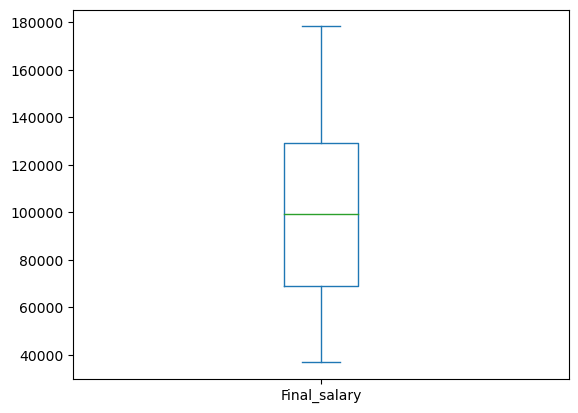

In [42]:
df['Final_salary'].plot(kind = 'box')

In [45]:
Q1_salary = np.quantile(df['Salary'],0.25)
Q2_salary = np.quantile(df['Salary'],0.50)
Q3_salary = np.quantile(df['Salary'],0.75)
df['Salary'].describe()

count       899.000000
mean      90479.672970
std       32743.875488
min       35013.000000
25%       62412.500000
50%       90730.000000
75%      118107.500000
max      149908.000000
Name: Salary, dtype: float64

In [44]:
IQR = (Q3_salary - Q1_salary)/2
print("IQR: ", IQR)
Upper = Q3_salary+1.5*IQR
lower =  Q1_salary-1.5*IQR  
[lower,Upper]

IQR:  27847.5


[20641.25, 159878.75]

In [ ]:
df['Final_salary'].min(),df['Final_salary'].max()

# Data visualization
Data Visualization is the process of analyzing data in the form of graphs or maps, making it a lot easier to understand the trends or patterns in the data.

Matplotlib 
Python Seaborn 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
# numerical summary statistics
df.describe()

,Start_date,Salary,Bonus_perct,Final_salary
count,899,899.000000,899.000000,899.000000
mean,1998-11-19 19:53:19.555061120,90479.672970,10.200201,99677.876407
min,1980-01-19 00:00:00,35013.000000,1.015000,36858.930000
25%,1990-03-21 12:00:00,62412.500000,5.267000,68798.985000
50%,1999-08-06 00:00:00,90730.000000,9.770000,99308.000000
75%,2007-09-22 00:00:00,118107.500000,14.868500,129095.255000
max,2016-07-15 00:00:00,149908.000000,19.944000,178258.600000
std,NaN,32743.875488,5.551621,36400.444846


In [ ]:
# categorical summmary stats
df.describe(include = ['string','bool'])

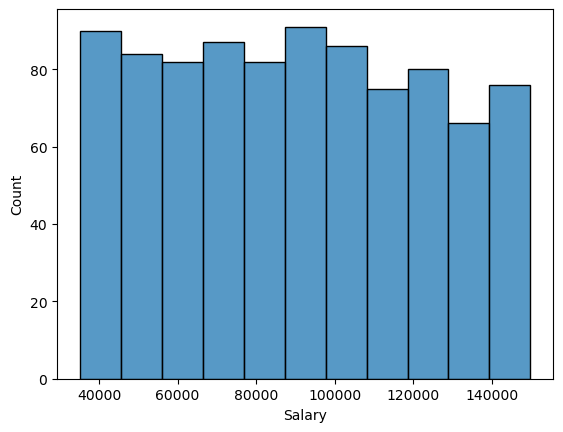

In [47]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x='Salary', data=df )
plt.show()

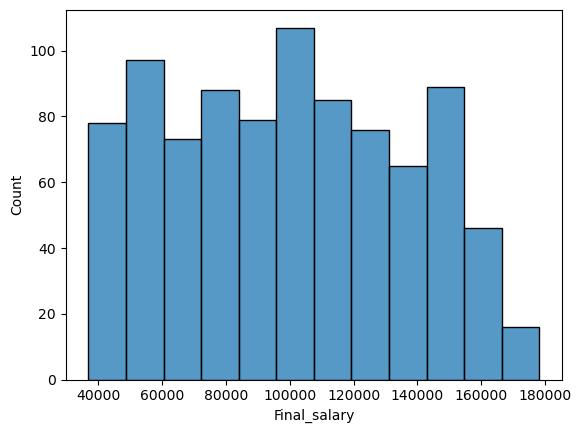

In [48]:
sns.histplot(x='Final_salary', data=df )
plt.show()

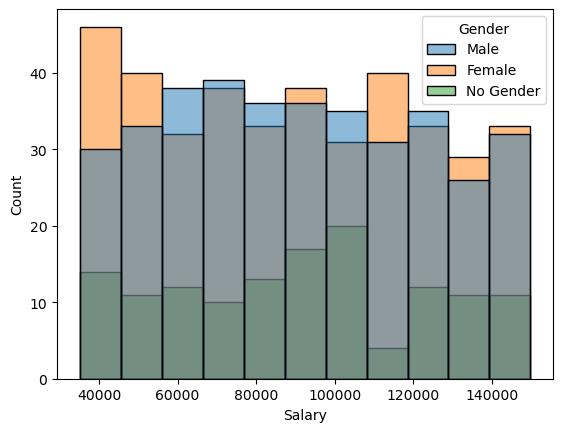

In [49]:
sns.histplot(x='Salary', hue = 'Gender',data=df )
plt.show()

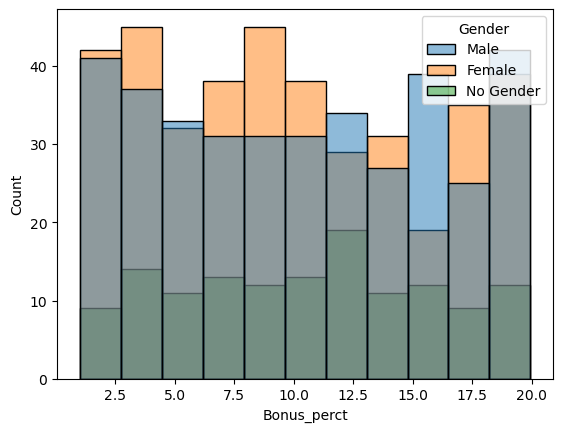

In [50]:
sns.histplot(x = 'Bonus_perct',hue = 'Gender',data = df)
plt.show()

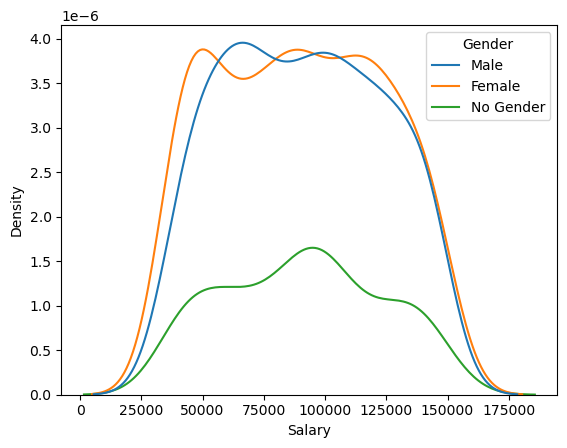

In [52]:
sns.kdeplot(x="Salary", hue = 'Gender',data=df )
plt.show()

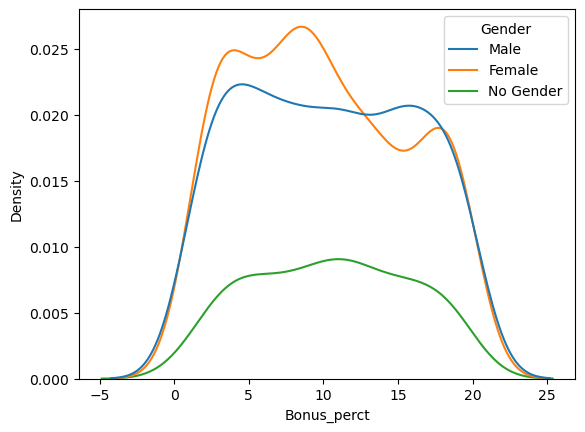

In [55]:
sns.kdeplot(x="Bonus_perct", hue='Gender', data=df )
plt.show()

# Relationship of variables

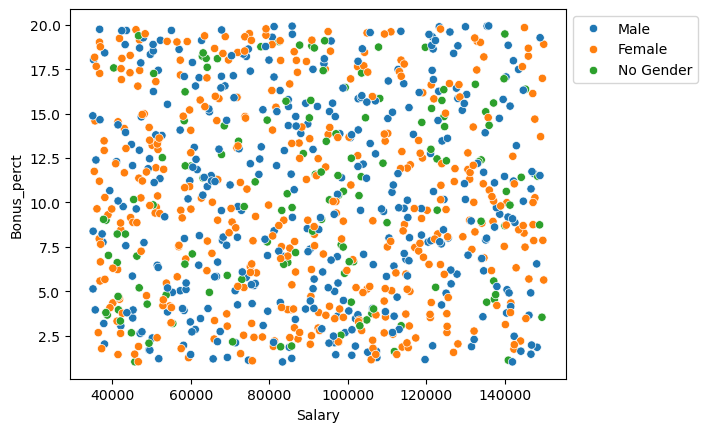

In [59]:
# Relationship of variables
sns.scatterplot(x="Salary", y='Bonus_perct', data=df,hue = 'Gender')
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [60]:
df['Salary'].corr(df['Bonus_perct'])

-0.01702025486966284

In [62]:
len(df[df['Bonus_perct']>=19])

54

In [63]:
bonus19 = df[df['Bonus_perct']>19].sort_values(['Bonus_perct'],ascending = False)

In [64]:
bonus19

,First_Name,Gender,Start_date,Last_Login_Time,Salary,Bonus_perct,Senior_Management,Team,Final_salary
442,Robert,Male,2007-03-11,11:20 AM,135882,19.944,False,Legal,162982.31
136,Sean,Male,1996-05-04,8:59 PM,135490,19.934,False,Marketing,162498.58
304,Robert,Male,2014-11-18,5:00 AM,85799,19.930,False,Finance,102898.74
742,Michael,Male,2002-08-31,1:20 AM,81206,19.908,True,Distribution,97372.49
317,Philip,Male,1989-08-02,11:21 AM,129968,19.897,False,Finance,155827.73
350,Robert,Male,1994-10-29,4:26 AM,123294,19.894,False,Client Services,147822.11
713,Rose,Female,1982-12-31,6:50 PM,145001,19.850,False,Engineering,173783.70
582,Elizabeth,Female,2010-02-21,7:02 AM,79145,19.780,False,Finance,94799.88
728,Evelyn,Female,2002-02-10,4:44 AM,123621,19.767,True,Marketing,148057.16
725,George,Male,1995-09-27,5:04 PM,36749,19.754,False,Finance,44008.40


# Task: line chart on salary and startdate by team or gender.

<Axes: xlabel='Start_date', ylabel='Salary'>

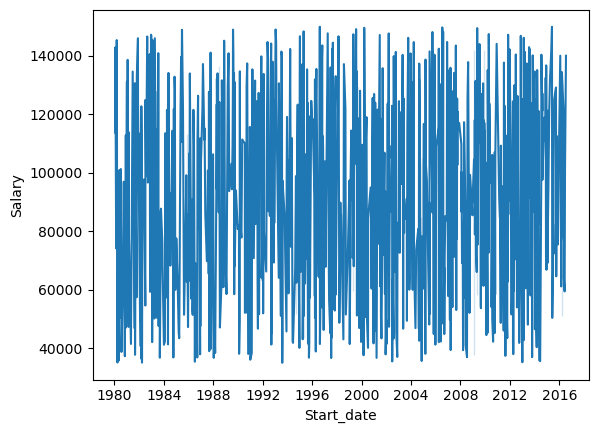

In [67]:
sns.lineplot(x="Start_date", y='Salary', data=df)

# Handling Outliers

In [ ]:
# Load the dataset
df = sns.load_dataset("iris")
print(df.head())

In [ ]:
df['species'].value_counts()

In [ ]:
sns.get_dataset_names()

In [ ]:
sns.boxplot(data=df)

In [ ]:
df.shape

In [ ]:
# IQR
Q1 = np.percentile(df['sepal_width'], 25, method = 'midpoint')
Q3 = np.percentile(df['sepal_width'], 75, method = 'midpoint')
# print(Q1,Q3)
IQR = (Q3 - Q1)
print("Old Shape: ", df.shape)
Upper = Q3+1.5*IQR
# print(Upper)
lower =  Q1-1.5*IQR  
# print(lower)
[lower,Upper]

In [ ]:
df['sepal_width'].min(),df['sepal_width'].max()

In [ ]:
# Upper bound
max_Upper_value = np.where(df['sepal_width'] >= Upper)
print(max_Upper_value[0]) 

In [ ]:
# Lower bound
min_Lower_value = np.where(df['sepal_width'] <= lower)
print(min_Lower_value)

In [ ]:
# df.head(35)

In [ ]:
df.drop(min_Lower_value[0], inplace = True)

In [ ]:
df.drop(max_Upper_value[0], inplace = True)

In [ ]:
print("New Shape: ", df.shape)

In [ ]:
sns.boxplot(data=df)

In [ ]:
sns.boxplot(x='sepal_length', data=df)

In [ ]:
sns.boxplot(x='petal_length', data=df)

In [ ]:
sns.boxplot(x='petal_width', data=df)

In [ ]:
sns.pairplot(df)

In [ ]:
sample_df = pd.read_excel(r"C:\Users\excel\DATA Science\Datasets\Sample - Superstore.xls",sheet_name='People')
sample_df

In [ ]:
sample_df.shape

In [ ]:
!pip install xlrd